In [3]:
!ls /eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/models_archive/gcn_models/ACAT2022/

normalization_factors  tests_norechits		  tests_profiler
reweightings	       tests_norechits_focalloss  tests_simpler_rechits
tests		       tests_noSoftF1
tests_focal_loss       tests_onlySA


In [6]:
models_folder = "/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/models_archive/gcn_models/ACAT2022/"

In [58]:
from glob import glob
import os
from os import path
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import mplhep as hep

hep.style.use(hep.style.ROOT)
import matplotlib as mtp
mtp.rcParams['figure.dpi'] = 72
import hist

In [127]:
trainings = glob(f"{models_folder}/tests*/*datasetv10*/training_history.csv", recursive=True)
trainings

['/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/models_archive/gcn_models/ACAT2022/tests_focal_loss/run_03_datasetv10/training_history.csv',
 '/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/models_archive/gcn_models/ACAT2022/tests_norechits/run_12_datasetv10/training_history.csv',
 '/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/models_archive/gcn_models/ACAT2022/tests_norechits/run_13_datasetv10_small/training_history.csv',
 '/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/models_archive/gcn_models/ACAT2022/tests_onlySA/run_09_datasetv10/training_history.csv',
 '/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/models_archive/gcn_models/ACAT2022/tests_onlySA/run_10_datasetv10_smaller/training_history.csv',
 '/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/models_archive/gcn_models/ACAT2022/tests_simpler_rechits/run_15_datasetv10/training_history.csv',
 '/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/models_archive/gcn_models/ACAT2022/tests_simpler

In [109]:
trainings = glob(f"{models_folder}/tests*/*/training_history.csv", recursive=True)
trainings

['/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/models_archive/gcn_models/ACAT2022/tests/run_27/training_history.csv',
 '/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/models_archive/gcn_models/ACAT2022/tests_noSoftF1/run_02_nosoftf1/training_history.csv',
 '/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/models_archive/gcn_models/ACAT2022/tests_norechits/run_07/training_history.csv',
 '/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/models_archive/gcn_models/ACAT2022/tests_norechits/run_09/training_history.csv',
 '/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/models_archive/gcn_models/ACAT2022/tests_norechits/run_12_datasetv10/training_history.csv',
 '/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/models_archive/gcn_models/ACAT2022/tests_norechits/run_13_datasetv10_small/training_history.csv',
 '/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/models_archive/gcn_models/ACAT2022/tests_onlySA/run_09_datasetv10/training_history.csv',
 '/eos/user/d/

In [21]:
path.dirname('/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/models_archive/gcn_models/ACAT2022/tests_norechits/run_12_datasetv10/training_history.csv')

'/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/models_archive/gcn_models/ACAT2022/tests_norechits/run_12_datasetv10'

In [45]:
metrics = [
    "lr", "dropout","l2_reg", "l2reg_alpha",
    "opt", "activation", 
    "output_dim_rechits", "output_dim_nodes",
    "output_dim_gconv",
    "output_dim_sa_clclass",
    "output_dim_sa_windclass",
    "output_dim_sa_enregr",
    "coord_dim",
    "coord_dim_sa",
    "nconv_rechits",
    "nconv",
]

In [50]:
def load_training_info(basedir):
    config = json.load(open(path.join(basedir, "training_config.json")))
    metadata = {}
    for m in metrics:
        metadata[m] = config.get(m, None)
    logs = pd.read_csv(path.join(basedir, "training_history.csv"), sep=";")
    return metadata, logs

### Collecting data

In [129]:
metadata = {} 
logs = {}
for tr in trainings:
    p = tr.split("/")
    basedir = path.dirname(tr)
    name = f"{p[-3]}/{p[-2]}"
    m, l = load_training_info(basedir)
    metadata[name] = m 
    logs[name] = l

### Plots

Text(0.4, 0.8, 'training = 1.5M events\nvalidation = 400k events')

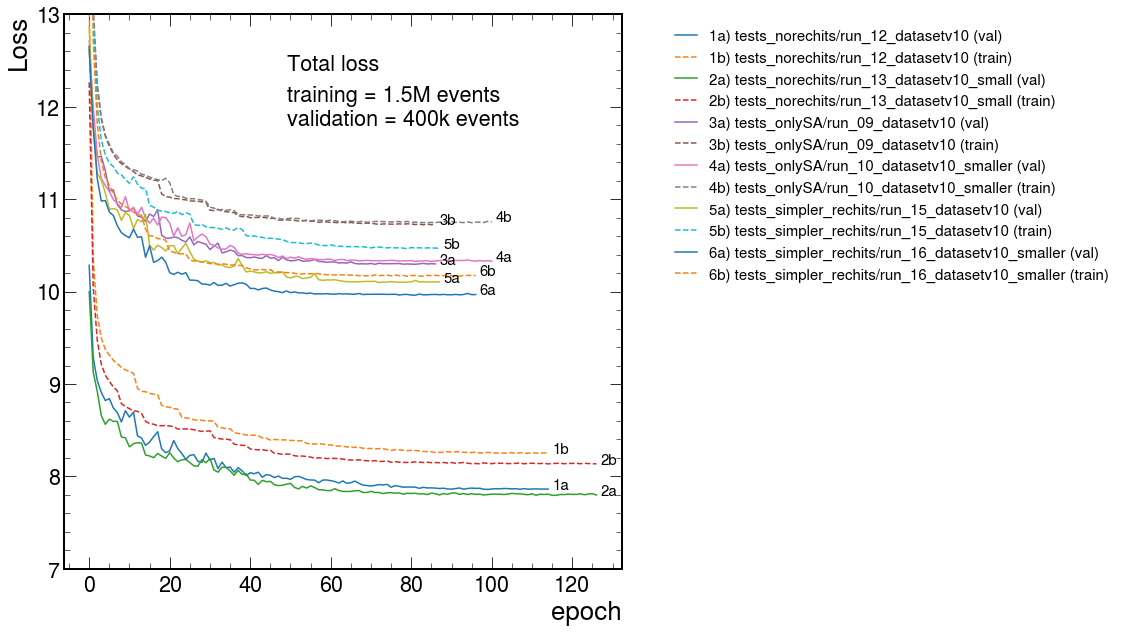

In [159]:
fig = plt.figure()
ax = plt.gca()
for i, (name, l) in enumerate(logs.items()):
    if "focal_loss" in name: continue
    ax.plot(l.val_loss,label=f"{i}a) {name} (val)")
    ax.text(len(l.val_loss), l.val_loss.values[-1],f"{i}a",fontsize=15)
    ax.plot(l.loss,label=f"{i}b) {name} (train)", linestyle="dashed")
    ax.text(len(l.loss), l.loss.values[-1],f"{i}b",fontsize=15)

ax.legend(fontsize="15", ncols=1, bbox_to_anchor=(1.9, 1.), bbox_transform=ax.transAxes)
ax.set_xlabel("epoch")
ax.set_ylabel("Loss")
ax.set_ylim(7, 13)

ax.text(0.4, 0.9,"Total loss", transform=ax.transAxes,fontsize="small")
ax.text(0.4, 0.8,"training = 1.5M events\nvalidation = 400k events", transform=ax.transAxes,fontsize="small")

Text(0.4, 0.8, 'training = 1.5M events\nvalidation = 400k events')

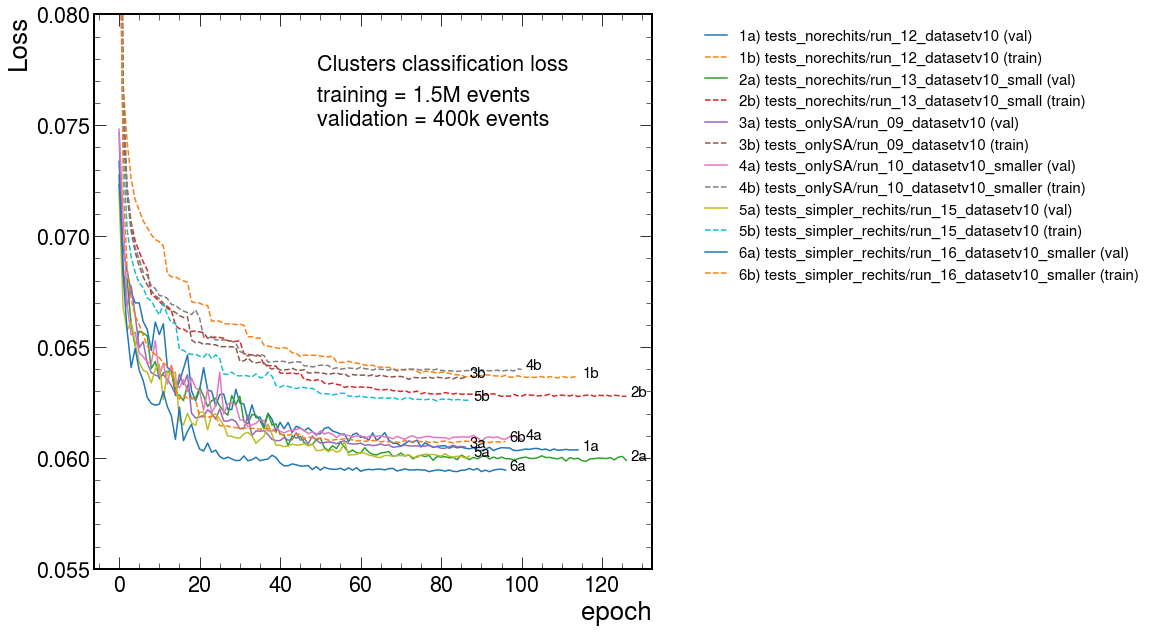

In [157]:
fig = plt.figure()
ax = plt.gca()
for i, (name, l) in enumerate(logs.items()):
    if "focal_loss" in name: continue
    ax.plot(l.val_loss_clusters,label=f"{i}a) {name} (val)")
    ax.text(len(l.val_loss_clusters), l.val_loss_clusters.values[-1],f"{i}a",fontsize=15)
    ax.plot(l.loss_clusters,label=f"{i}b) {name} (train)", linestyle="dashed")
    ax.text(len(l.loss_clusters), l.loss_clusters.values[-1],f"{i}b",fontsize=15)

ax.legend(fontsize="15", ncols=1, bbox_to_anchor=(1.9, 1.), bbox_transform=ax.transAxes)
ax.set_xlabel("epoch")
ax.set_ylabel("Loss")
ax.set_ylim(0.055, 0.08)

ax.text(0.4, 0.9,"Clusters classification loss", transform=ax.transAxes,fontsize="small")
ax.text(0.4, 0.8,"training = 1.5M events\nvalidation = 400k events", transform=ax.transAxes,fontsize="small")

Text(0.4, 0.8, 'training = 1.5M events\nvalidation = 400k events')

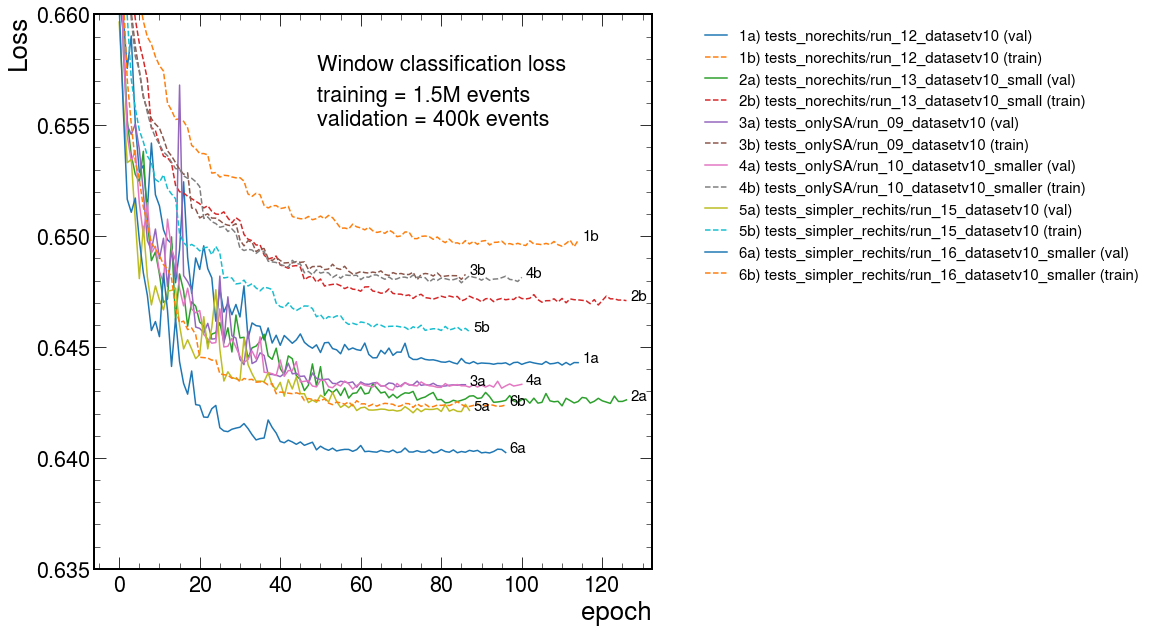

In [164]:
fig = plt.figure()
ax = plt.gca()
for i, (name, l) in enumerate(logs.items()):
    if "focal_loss" in name: continue
    ax.plot(l.val_loss_windows,label=f"{i}a) {name} (val)")
    ax.text(len(l.val_loss_windows), l.val_loss_windows.values[-1],f"{i}a",fontsize=15)
    ax.plot(l.loss_windows,label=f"{i}b) {name} (train)", linestyle="dashed")
    ax.text(len(l.loss_windows), l.loss_windows.values[-1],f"{i}b",fontsize=15)

ax.legend(fontsize="15", ncols=1, bbox_to_anchor=(1.9, 1.), bbox_transform=ax.transAxes)
ax.set_xlabel("epoch")
ax.set_ylabel("Loss")
ax.set_ylim(0.635, 0.66)

ax.text(0.4, 0.9,"Window classification loss", transform=ax.transAxes,fontsize="small")
ax.text(0.4, 0.8,"training = 1.5M events\nvalidation = 400k events", transform=ax.transAxes,fontsize="small")

Text(0.4, 0.8, 'training = 1.5M events\nvalidation = 400k events')

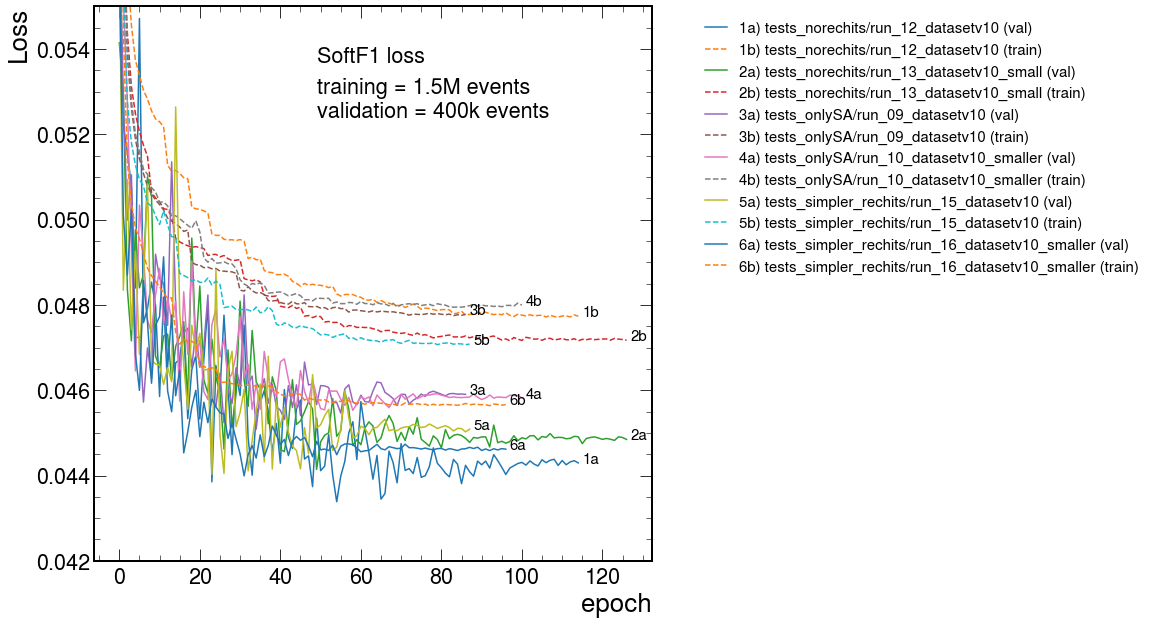

In [168]:
fig = plt.figure()
ax = plt.gca()
loss = "softF1"
for i, (name, l) in enumerate(logs.items()):
    if "focal_loss" in name: continue
    ax.plot(l[f"val_loss_{loss}"],label=f"{i}a) {name} (val)")
    ax.text(len(l[f"val_loss_{loss}"]), l[f"val_loss_{loss}"].values[-1],f"{i}a",fontsize=15)
    ax.plot(l[f"loss_{loss}"],label=f"{i}b) {name} (train)", linestyle="dashed")
    ax.text(len(l[f"loss_{loss}"]), l[f"loss_{loss}"].values[-1],f"{i}b",fontsize=15)

ax.legend(fontsize="15", ncols=1, bbox_to_anchor=(1.9, 1.), bbox_transform=ax.transAxes)
ax.set_xlabel("epoch")
ax.set_ylabel("Loss")
ax.set_ylim(0.042, 0.055)

ax.text(0.4, 0.9,"SoftF1 loss", transform=ax.transAxes,fontsize="small")
ax.text(0.4, 0.8,"training = 1.5M events\nvalidation = 400k events", transform=ax.transAxes,fontsize="small")

Text(0.4, 0.8, 'training = 1.5M events\nvalidation = 400k events')

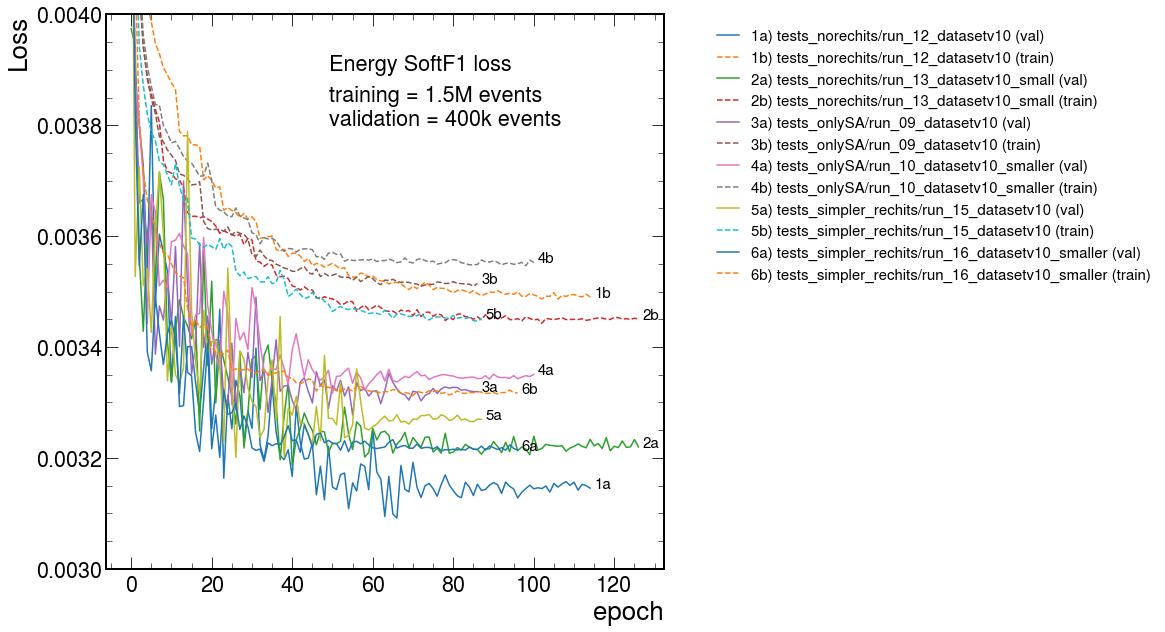

In [171]:
fig = plt.figure()
ax = plt.gca()
loss = "en_softF1"
for i, (name, l) in enumerate(logs.items()):
    if "focal_loss" in name: continue
    ax.plot(l[f"val_loss_{loss}"],label=f"{i}a) {name} (val)")
    ax.text(len(l[f"val_loss_{loss}"]), l[f"val_loss_{loss}"].values[-1],f"{i}a",fontsize=15)
    ax.plot(l[f"loss_{loss}"],label=f"{i}b) {name} (train)", linestyle="dashed")
    ax.text(len(l[f"loss_{loss}"]), l[f"loss_{loss}"].values[-1],f"{i}b",fontsize=15)

ax.legend(fontsize="15", ncols=1, bbox_to_anchor=(1.9, 1.), bbox_transform=ax.transAxes)
ax.set_xlabel("epoch")
ax.set_ylabel("Loss")
ax.set_ylim(0.003, 0.004)

ax.text(0.4, 0.9,"Energy SoftF1 loss", transform=ax.transAxes,fontsize="small")
ax.text(0.4, 0.8,"training = 1.5M events\nvalidation = 400k events", transform=ax.transAxes,fontsize="small")